# Neural Network Classifer with TPOT

## Exploring the dataset

In [1]:
#importing libs and loading the built in breast cancer dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from matplotlib import rcParams

rcParams["figure.figsize"] = (14,7)
rcParams["axes.spines.top"] = False
rcParams["axes.spines.right"] = False

In [2]:
#loading the breast cancer dataset
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
#Extracting the data and target columns

features = data.data
target = data.target
df = pd.DataFrame(data=features,columns=data.feature_names)
df["target"] = target
df.sample(8)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
203,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,...,41.85,128.50,1153.0,0.2226,0.5209,0.46460,0.20130,0.4432,0.10860,0
207,17.01,20.26,109.70,904.3,0.08772,0.07304,0.06950,0.05390,0.2026,0.05223,...,25.05,130.00,1210.0,0.1111,0.1486,0.19320,0.10960,0.3275,0.06469,0
81,13.34,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.06987,0.1942,0.06902,...,23.19,96.66,614.9,0.1536,0.4791,0.48580,0.17080,0.3527,0.10160,1
82,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,0.1829,0.06782,...,33.62,211.70,2562.0,0.1573,0.6076,0.64760,0.28670,0.2355,0.10510,0
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,26.00,124.90,1156.0,0.1546,0.2394,0.37910,0.15140,0.2837,0.08019,0
294,12.72,13.78,81.78,492.1,0.09667,0.08393,0.01288,0.01924,0.1638,0.06100,...,17.48,88.54,553.7,0.1298,0.1472,0.05233,0.06343,0.2369,0.06922,1
523,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843,...,25.63,99.43,701.9,0.1425,0.2566,0.19350,0.12840,0.2849,0.09031,1
475,12.83,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.03078,0.1705,0.05913,...,19.35,93.22,605.8,0.1326,0.2610,0.34760,0.09783,0.3006,0.07802,1


In [4]:
#checking for missing data

df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [5]:
#creating a function that takes any categorical attribute and visualizes its distribution

def make_count_chart(column,title,ylabel,xlabel,y_offset=0.12,x_offset=700):
  ax = df[column].value_counts().plot(kind="bar",fontsize=13,color="#4f4f4f")
  ax.set_title(title,size=20,pad=30)
  ax.set_ylabel(ylabel,fontsize=14)
  ax.set_xlabel(xlabel,fontsize=14)

  for i in ax.patches:
    ax.text(i.get_x() + x_offset, i.get_height() + y_offset, f"{str(round(i.get_height(),2))}",fontsize=15)
  return ax

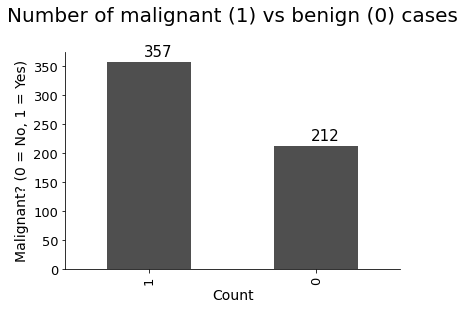

In [6]:
#using the function to visualize the target variable to find out how many instances were benign and how many were malignant

make_count_chart(
    column = "target",
    title = 'Number of malignant (1) vs benign (0) cases',
    ylabel="Malignant? (0 = No, 1 = Yes)",
    xlabel="Count",
    y_offset=10,
    x_offset=0.22
)

In [7]:
#correlation analysis on the mean area feature and the target column

np.corrcoef(df["mean area"],df["target"])[1][0]

-0.7089838365853891

In [8]:
#displaying the correlations of all features with the target

corr_with_target = []

for col in df.columns[:-1]:
  corr = np.corrcoef(df[col], df["target"])[1][0]
  corr_with_target.append({"Column":col,"Correlation":corr})

corr_df = pd.DataFrame(corr_with_target)
corr_df = corr_df.sort_values(by="Correlation",ascending=False)

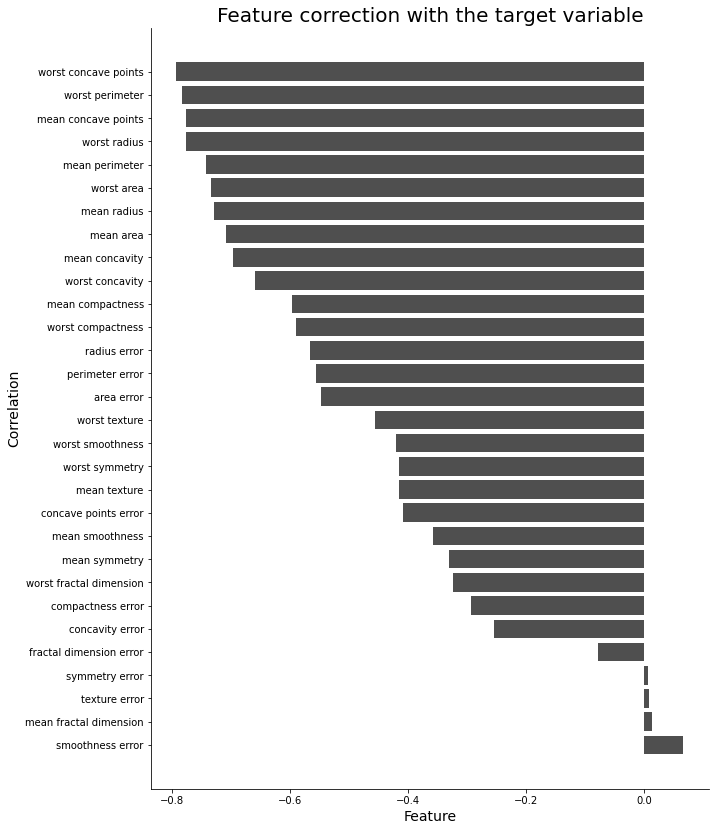

In [9]:
#Creating a horizontal bar chart of the correlations with the target variable

plt.figure(figsize=(10,14))
plt.barh(corr_df["Column"],corr_df["Correlation"],color="#4f4f4f")
plt.title("Feature correction with the target variable",fontsize=20)
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Correlation",fontsize=14)
plt.show()

# Exploring options for training neural network classifiers

In [10]:
#Creating a Pytorch based logistic regression estimator

tpot_config = {
    "tpot.nn.PytorchLRClassifier":{
        "learning_rate":[1e-3,1e-2,1e-1,0.5,1.]
    }
}

## Training a neural network classifier

In [19]:
#spliting the data into train/test with a 75:25 ratio

from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
#creating a baseline logistic regression model to comapre with TPOT model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print(confusion_matrix(y_test, lr_preds))
print()
print(accuracy_score(y_test, lr_preds))

[[51  3]
 [ 2 87]]

0.965034965034965


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [14]:
#installing tpot

!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.2 MB/s 
     |████████████████████████████████| 192.9 MB 77 kB/s 
     |████████████████████████████████| 160 kB 74.2 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=b4fc3cd14fbd73e337cc7ccaba822a89453a73b718556ed105c5e826413eb81a
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [21]:
#Creating tpot based model

from tpot import TPOTClassifier

In [24]:
from tpot import TPOTClassifier

classifier_lr = TPOTClassifier(
    config_dict='TPOT NN',
    template='PytorchMLPClassifier',
    generations=2,
    random_state=42,
    verbosity=3
)

In [27]:
#classifier_lr.fit(X_train, y_train)
#Sadly I was not able to get TPOT to work with neural nets. This is a similiar experence I've had with autokeras. Could be the google colab or the library itself.